In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statistics as sts

# sns.kdeplot()
bir veya daha fazla sürekli değişkenin çekirdek yoğunluk tahmini (Kernel Density Estimate, KDE) grafiğini çizer. KDE, verinin olasılık yoğunluk fonksiyonunu düzgün bir 
eğriyle yaklaşık olarak gösterir.


# Ne İşe Yarar?
Dağılımın şekli: Histogram’ın yerine, verinin dağılımını daha pürüzsüz bir eğri ile görmeyi sağlar.

Yoğunluk zirveleri: Verinin hangi değer aralıklarında yoğunlaştığını net gösterir.

Karşılaştırma: Farklı grupların dağılımını tek bir grafikte üst üste veya doldurulmuş olarak karşılaştırmak için ideal.


# Ne Zaman Kullanmalı?
Sürekli değişkenlerin dağılımını pürüzsüz bir eğriyle incelemek istiyorsan.

Histogram çubuklarından çok, eğri üzerindeki zirvelerden yoğun bölge bilgisi almak için.

Farklı grupların (hue) dağılımlarını aynı eksende kıyaslamak için.



# Parametre | Ne İşe Yarar? | Örnek Kullanım
data | Veri çerçevesini belirtir | data=tips


x, y | KDE’si çizilecek sayısal sütunu seçer | x="total_bill"

hue | Grupları farklı renklerle ayırır | hue="sex"

fill | Eğrinin altını doldurur (saydamlık için alpha eklenebilir) | fill=True, alpha=0.5

bw_adjust | Band genişliği (bandwidth) ayarı; küçük→daha keskin, büyük→daha pürüzsüz | bw_adjust=0.8

cut | KDE eğrisinin veri aralığını ne kadar aşacağını kontrol eder | cut=0

kernel | Kullanılacak çekirdek fonksiyonunu seçer ("gau", "epanechnikov", vb.) | kernel="epa"

common_norm | hue ile normalize edip etmeyeceğini belirler; gruplar ayrı normalize edilsin mi? | common_norm=False


multiple | Çoklu KDE’leri nasıl çizsin? ("layer", "stack", "fill") | multiple="stack"

In [2]:
data = pd.read_csv('supermarket_sales.csv')
data = data[['Gender' , 'Payment' , 'Unit price' , 'Quantity' , 'Total' , 'gross income']]
data.head(10)

,Gender,Payment,Unit price,Quantity,Total,gross income
0,Female,Ewallet,74.69,7,548.9715,26.1415
1,Female,Cash,15.28,5,80.2200,3.8200
2,Male,Credit card,46.33,7,340.5255,16.2155
3,Male,Ewallet,58.22,8,489.0480,23.2880
4,Male,Ewallet,86.31,7,634.3785,30.2085
5,Male,Ewallet,85.39,7,627.6165,29.8865
6,Female,Ewallet,68.84,6,433.6920,20.6520
7,Female,Ewallet,73.56,10,772.3800,36.7800
8,Female,Credit card,36.26,2,76.1460,3.6260
9,Female,Credit card,54.84,3,172.7460,8.2260


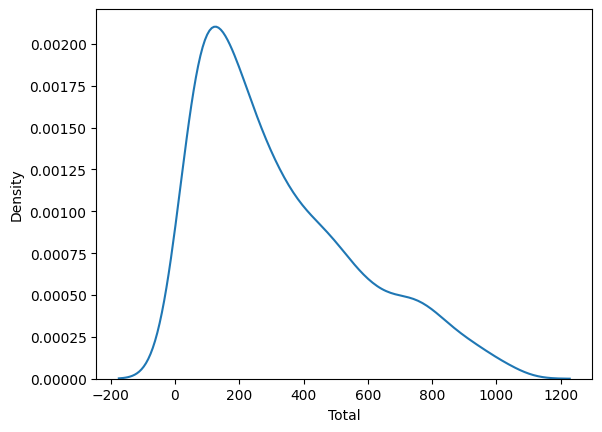

In [3]:
sns.kdeplot(data=data , x='Total')
plt.show()

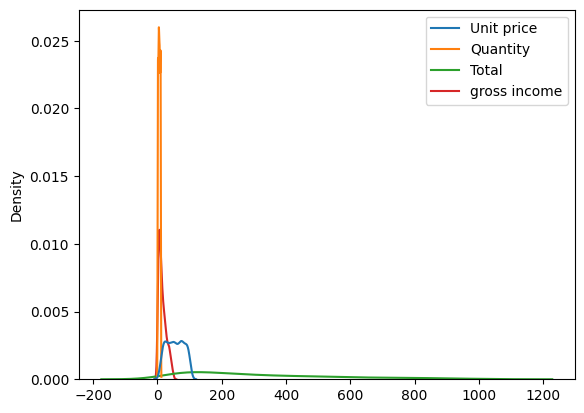

In [4]:
sns.kdeplot(data=data)
plt.show()

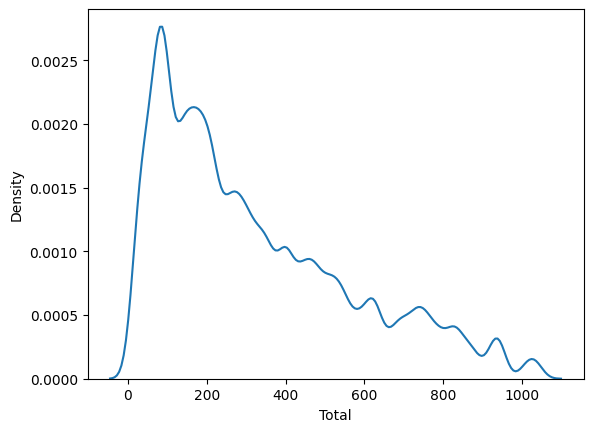

In [5]:
sns.kdeplot(data=data , x='Total' , bw_adjust=0.3)
#bw_adjust	Band genişliği (bandwidth) ayarı; küçük→daha keskin, büyük→daha pürüzsüz
plt.show()

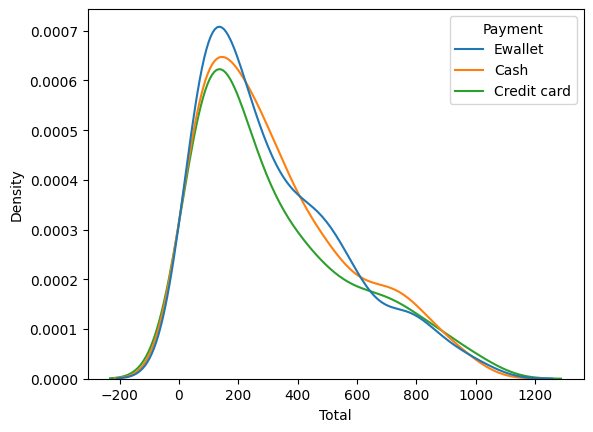

In [6]:
sns.kdeplot(data=data , x='Total' , hue='Payment')
plt.show()

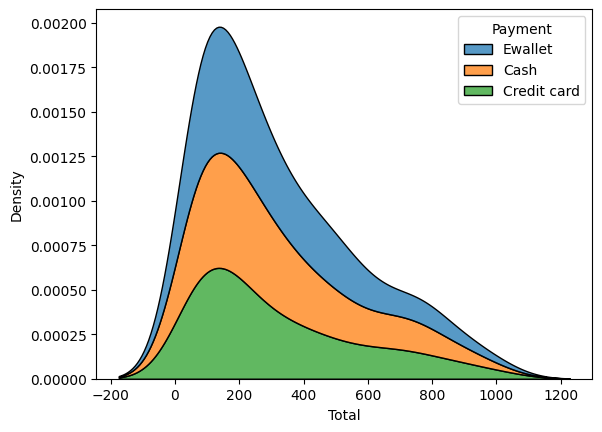

In [7]:
sns.kdeplot(data=data , x='Total' , hue='Payment' , multiple='stack')
plt.show()

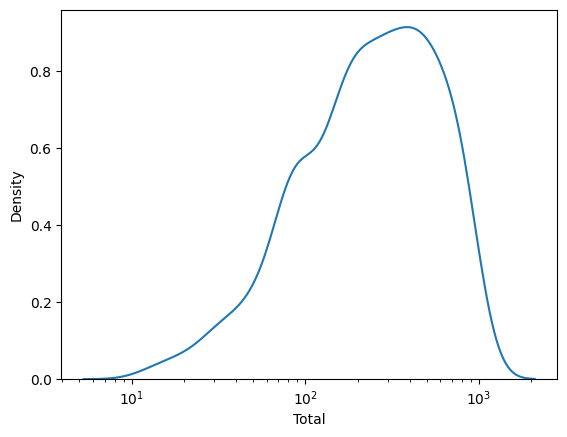

In [8]:
sns.kdeplot(data=data , x='Total' , log_scale=True)
# Veriyi logaritmik ölçekle gösterir.
# Normalde veriler doğrusal (linear) olarak çizilirken, log_scale=True dersen:
# X ekseni, Y ekseni veya her ikisi de logaritmik ölçeğe dönüşür.
# Böylece çok büyük–çok küçük değerleri aynı grafikte daha okunur hale getirirsin.
plt.show()

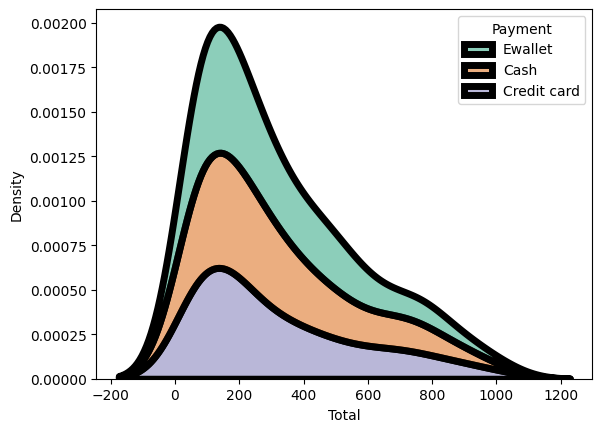

In [9]:
sns.kdeplot(data=data , x='Total' , hue='Payment' , multiple='stack',
            linewidth=5 , palette='Dark2' , alpha=0.5)
plt.show()

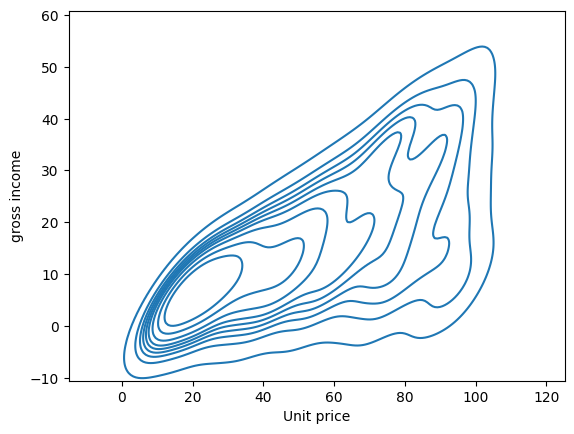

In [10]:
sns.kdeplot(data=data , x='Unit price' , y='gross income')
plt.show()

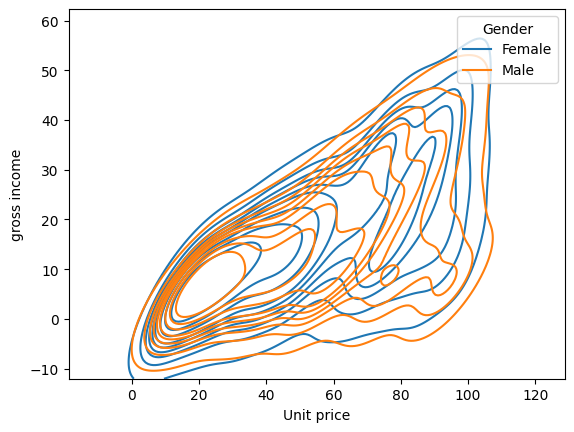

In [11]:
sns.kdeplot(data=data , x='Unit price' , y='gross income' , hue='Gender')
plt.show()

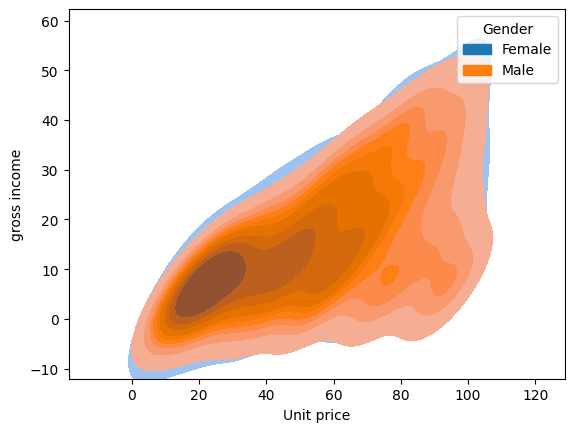

In [12]:
sns.kdeplot(data=data , x='Unit price' , y='gross income' , hue='Gender',
            fill=True)
# fill	Eğrinin altını doldurur	Yoğunluğu daha okunaklı ve görsel hale getirmek için
plt.show()

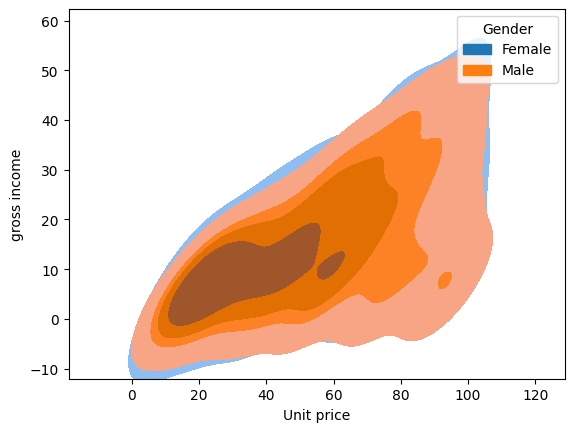

In [13]:
sns.kdeplot(data=data , x='Unit price' , y='gross income' , hue='Gender',
            fill=True ,levels=5)
plt.show()

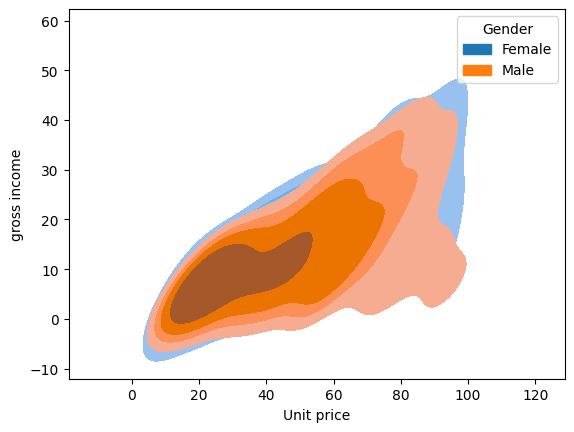

In [ ]:
sns.kdeplot(data=data , x='Unit price' , y='gross income',
            hue='Gender', fill=True , levels=5 , thresh=0.2)
# thresh, sns.kdeplot() fonksiyonunda dolgu (fill=True) açıkken kullanılır.
# Yoğunluk değeri belirli bir eşik değerinin (threshold) altında ise, o alanı doldurmaz.
# Böylece çok düşük yoğunluklu yerler grafikte görünmez ve sadece anlamlı, yoğun bölgeler vurgulanır.
plt.show()

In [14]:
df = pd.read_csv('tips.csv')

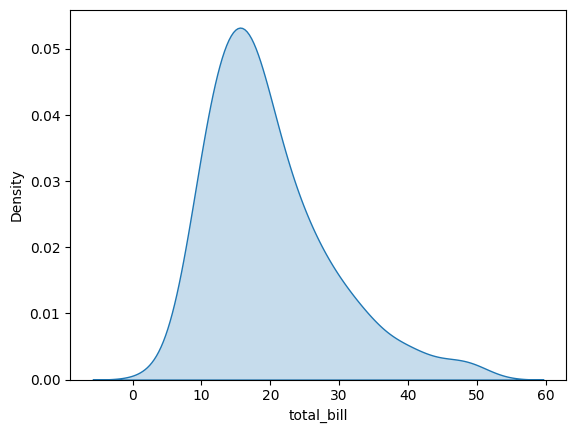

In [15]:
sns.kdeplot(data=df, x="total_bill", fill=True)
plt.show()
# fill Eğrinin altını doldurur, yoğunluk görselleştirmesini kolaylaştırır.

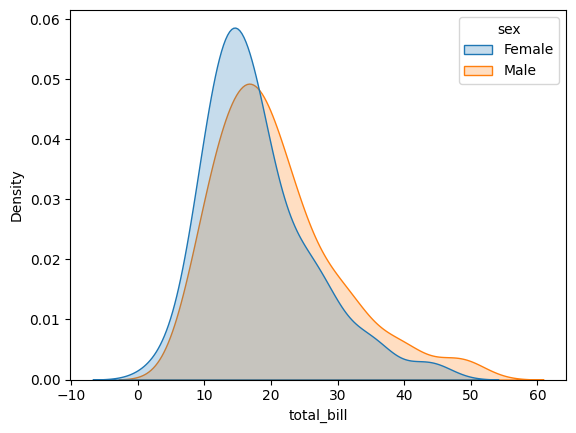

In [16]:
sns.kdeplot(data=df, x="total_bill", hue="sex",
             fill=True, common_norm=False)
# common_norm Erkek ve kadın grupları bağımsız normalize edilir.Grupların kendi iç yoğunlukları kıyaslanabilir.

plt.show()


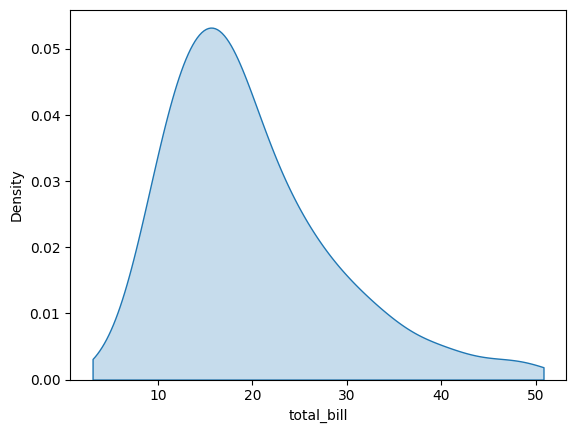

In [17]:
sns.kdeplot(data=df, x="total_bill", fill=True, cut=0)
# cut  KDE eğrisi sadece veri sınırları içinde çizilir, dışarı taşmaz.
plt.show()
